In [172]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

First, lets get the FPs with the associated codes

In [173]:
fp_cols = ['fips','county_name','state_abbr','state_name']

county_fp_df = pd.read_csv(
    '/Users/toddhendricks/Downloads/fps - Sheet1.csv', 
    usecols=fp_cols
)

In [174]:
county_fp_df.county_name

0          Autauga County
1          Baldwin County
2          Barbour County
3             Bibb County
4           Blount County
              ...        
3141    Sweetwater County
3142         Teton County
3143         Uinta County
3144      Washakie County
3145        Weston County
Name: county_name, Length: 3146, dtype: object

In [175]:
county_fp_df.head(5)

,fips,county_name,state_abbr,state_name
0,1001,Autauga County,AL,Alabama
1,1003,Baldwin County,AL,Alabama
2,1005,Barbour County,AL,Alabama
3,1007,Bibb County,AL,Alabama
4,1009,Blount County,AL,Alabama


Then let's get the votes by county

In [176]:
votes_df = pd.read_csv('/Users/toddhendricks/Downloads/usa-2016-presidential-election-by-county.csv', sep=';').fillna(0)

In [177]:
votes_df.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Democrats 08 (Votes)', 'Democrats 12 (Votes)',
       'Republicans 08 (Votes)', 'Republicans 12 (Votes)',
       ...
       'total08', 'total12', 'other08', 'other12', 'Other12 Frac',
       'Other08 Frac', 'Rep12 Frac2', 'Rep08 Frac2', 'Dem12 Frac2',
       'Dem08 Frac2'],
      dtype='object', length=159)

In [178]:
votes_county_sep = votes_df['County'].str.split(',').str[0]

In [179]:
votes_df['county_clean'] = votes_county_sep

In [180]:
joined_votes_df = county_fp_df.merge(votes_df,left_on='fips',right_on='Fips')

In [181]:
masks_df = pd.read_csv('/Users/toddhendricks/Downloads/masks - Sheet1.csv')

In [182]:
mask_plus_votes_df = joined_votes_df.merge(masks_df,left_on='fips',right_on='COUNTYFP')

In [183]:
for col in mask_plus_votes_df.columns:
    print(col)

fips
county_name
state_abbr
state_name
State
ST
Fips
County
Precincts
Votes
Democrats 08 (Votes)
Democrats 12 (Votes)
Republicans 08 (Votes)
Republicans 12 (Votes)
Republicans 2016
Democrats 2016
Green 2016
Libertarians 2016
Republicans 2012
Republicans 2008
Democrats 2012
Democrats 2008
Less Than High School Diploma
At Least High School Diploma
At Least Bachelors's Degree
Graduate Degree
School Enrollment
Median Earnings 2010
White (Not Latino) Population
African American Population
Native American Population
Asian American Population
Other Race or Races
Latino Population
Children Under 6 Living in Poverty
Adults 65 and Older Living in Poverty
Total Population
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4
Poverty.Rate.below.federal.poverty.threshold
Gini.Coefficient
Child.Poverty.living.in.families.below.the.poverty.line
Management.professional.and.related.occupations
Service.occupations
Sales.and.office.occupations
Farming.fishing.and.forestry.occupations
Construction.extraction.m

In [184]:
mask_plus_votes_df['Republicans 2016'] = mask_plus_votes_df['Republicans 2016'].astype(int)

In [185]:
x = mask_plus_votes_df['Republicans 2016']

In [186]:
mask_plus_votes_df['NEVER'] = mask_plus_votes_df['NEVER'] * 100 

In [187]:
mask_plus_votes_df.head(4)

,fips,county_name,state_abbr,state_name,State,ST,Fips,County,Precincts,Votes,...,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2,county_clean,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,Autauga County,AL,Alabama,Alabama,AL,1001,"Autauga County, Alabama",20.0,24661.0,...,0.740679,0.268006,0.259321,Autauga County,1001,5.3,0.074,0.134,0.295,0.444
1,1003,Baldwin County,AL,Alabama,Alabama,AL,1003,"Baldwin County, Alabama",48.0,94090.0,...,0.759649,0.218190,0.240351,Baldwin County,1003,8.3,0.059,0.098,0.323,0.436
2,1005,Barbour County,AL,Alabama,Alabama,AL,1005,"Barbour County, Alabama",18.0,10390.0,...,0.507308,0.515791,0.492692,Barbour County,1005,6.7,0.121,0.120,0.201,0.491
3,1007,Bibb County,AL,Alabama,Alabama,AL,1007,"Bibb County, Alabama",10.0,8748.0,...,0.731457,0.264219,0.268543,Bibb County,1007,2.0,0.034,0.096,0.278,0.572


In [188]:
mask_plus_votes_df['NEVER'] = mask_plus_votes_df['NEVER'].astype(int)

In [189]:
y = mask_plus_votes_df['NEVER']

In [190]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(27.0, 0.5, 'Will Never Wear Mask in Public')

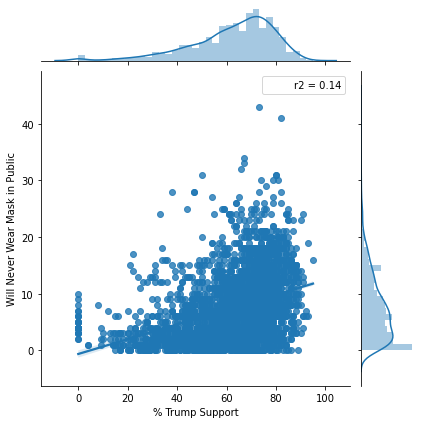

In [191]:
# sns.lmplot(x='Republicans 2016',y='NEVER',data=mask_plus_votes_df)
sns.jointplot(x, y, kind="reg", stat_func=r2)
plt.xlabel('% Trump Support')
plt.ylabel('Will Never Wear Mask in Public')

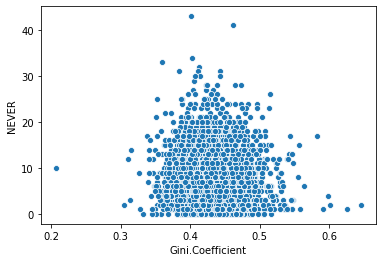

In [192]:
sns.scatterplot(x='Gini.Coefficient', y='NEVER',data=mask_plus_votes_df)

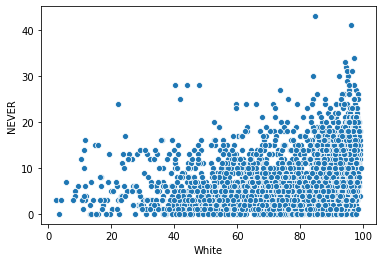

In [193]:
sns.scatterplot(x='White', y='NEVER',data=mask_plus_votes_df)

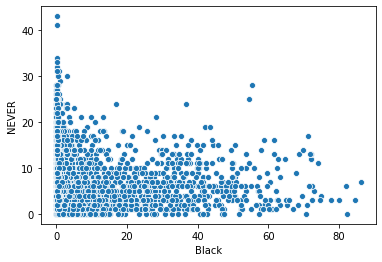

In [194]:
sns.scatterplot(x='Black', y='NEVER',data=mask_plus_votes_df)

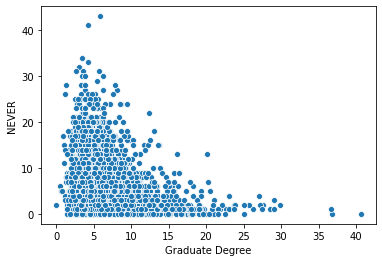

In [195]:
sns.scatterplot(x='Graduate Degree', y='NEVER',data=mask_plus_votes_df)

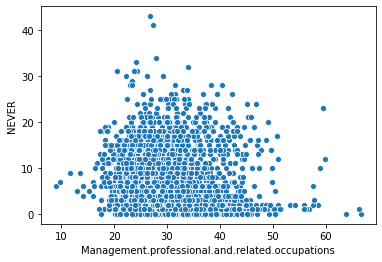

In [196]:
sns.scatterplot(x='Management.professional.and.related.occupations', y='NEVER',data=mask_plus_votes_df)

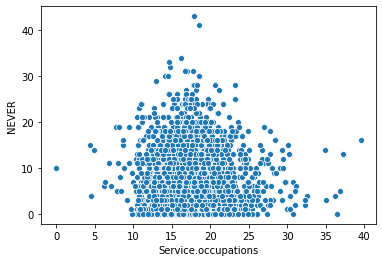

In [197]:
sns.scatterplot(x='Service.occupations', y='NEVER',data=mask_plus_votes_df)

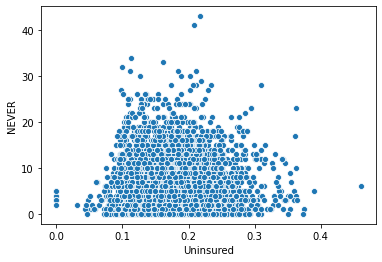

In [198]:
sns.scatterplot(x='Uninsured', y='NEVER',data=mask_plus_votes_df)

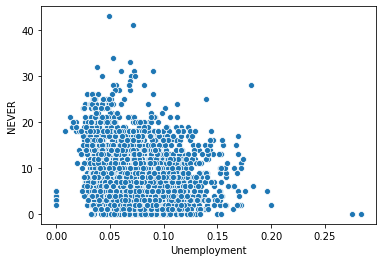

In [199]:
sns.scatterplot(x='Unemployment', y='NEVER',data=mask_plus_votes_df)

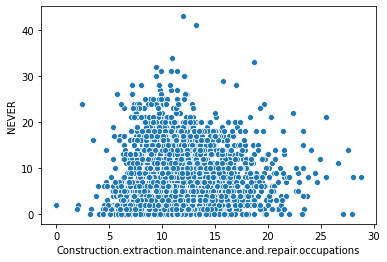

In [200]:
sns.scatterplot(x='Construction.extraction.maintenance.and.repair.occupations', y='NEVER',data=mask_plus_votes_df)

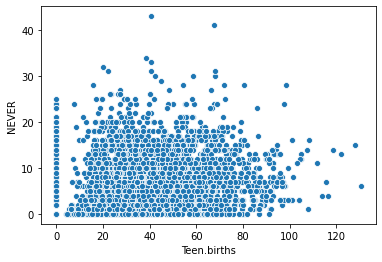

In [201]:
sns.scatterplot(x='Teen.births', y='NEVER',data=mask_plus_votes_df)

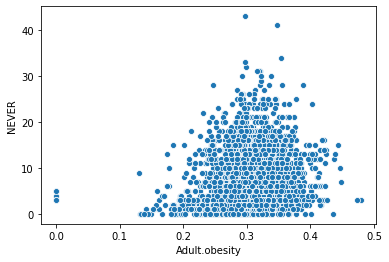

In [202]:
sns.scatterplot(x='Adult.obesity', y='NEVER',data=mask_plus_votes_df)

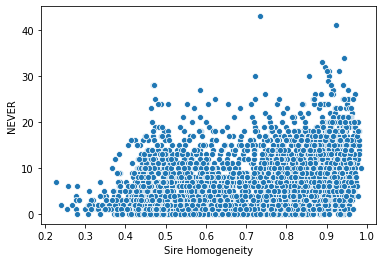

In [203]:
sns.scatterplot(x='Sire Homogeneity', y='NEVER',data=mask_plus_votes_df)

In [204]:
most_ignorant = mask_plus_votes_df.sort_values('NEVER',ascending=False)

In [205]:
most_ignorant.head(10)

,fips,county_name,state_abbr,state_name,State,ST,Fips,County,Precincts,Votes,...,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2,county_clean,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2789,49027,Millard County,UT,Utah,Utah,UT,49027,"Millard County, Utah",17.0,5234.0,...,0.828157,0.087798,0.171843,Millard County,49027,43,0.023,0.088,0.171,0.286
1596,29229,Wright County,MO,Missouri,Missouri,MO,29229,"Wright County, Missouri",11.0,8086.0,...,0.693442,0.250932,0.306558,Wright County,29229,41,0.139,0.187,0.100,0.155
803,19029,Cass County,IA,Iowa,Iowa,IA,19029,"Cass County, Iowa",14.0,7055.0,...,0.555078,0.403958,0.444922,Cass County,19029,34,0.070,0.124,0.238,0.227
2787,49023,Juab County,UT,Utah,Utah,UT,49023,"Juab County, Utah",18.0,4076.0,...,0.783586,0.115671,0.216414,Juab County,49023,33,0.023,0.079,0.193,0.369
1345,27063,Jackson County,MN,Minnesota,Minnesota,MN,27063,"Jackson County, Minnesota",28.0,5453.0,...,0.521914,0.426958,0.478086,Jackson County,27063,32,0.024,0.140,0.171,0.340
1535,29105,Laclede County,MO,Missouri,Missouri,MO,29105,"Laclede County, Missouri",16.0,15959.0,...,0.675760,0.272376,0.324240,Laclede County,29105,31,0.121,0.172,0.107,0.287
1511,29057,Dade County,MO,Missouri,Missouri,MO,29057,"Dade County, Missouri",9.0,3951.0,...,0.707510,0.244914,0.292490,Dade County,29057,31,0.044,0.138,0.136,0.369
3098,55103,Richland County,WI,Wisconsin,Wisconsin,WI,55103,"Richland County, Wisconsin",34.0,7962.0,...,0.395491,0.581714,0.604509,Richland County,55103,31,0.074,0.055,0.116,0.443
1589,29215,Texas County,MO,Missouri,Missouri,MO,29215,"Texas County, Missouri",11.0,10935.0,...,0.679059,0.273715,0.320941,Texas County,29215,30,0.171,0.231,0.106,0.183
1660,31013,Box Butte County,NE,Nebraska,Nebraska,NE,31013,"Box Butte County, Nebraska",9.0,4761.0,...,0.608551,0.370971,0.391449,Box Butte County,31013,30,0.112,0.096,0.285,0.203


Text(0.5, 0, '% of County')

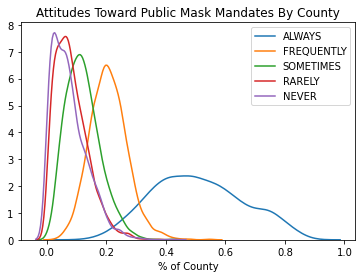

In [215]:
# sns.kdeplot(mask_plus_votes_df['NEVER'])
sns.kdeplot(mask_plus_votes_df['ALWAYS'])
sns.kdeplot(mask_plus_votes_df['FREQUENTLY'])
sns.kdeplot(mask_plus_votes_df['SOMETIMES'])
sns.kdeplot(mask_plus_votes_df['RARELY'])
sns.kdeplot(mask_plus_votes_df['NEVER'] / 100)
plt.title('Attitudes Toward Public Mask Mandates By County')
plt.xlabel('% of County')

This plot is the most illustrative. We can safely infer that, as negativity tends to increase, the views are less widely held. Even the most adamantly opposed counties - as defined by the 'NEVER' position - still only top out in the 30s. In other words, opposition to masks is a minority opinion everywhere. Also interesting is that the 'ALWAYS' view approximates a normal distribution - or, at least it is symetrical. The mean looks to be pretty close to 50 percent.  